# Credit Card Risk Classification using Decision Trees

## I. Introduction

### Objectives

## II. Importing the nessesary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## III. Exploartory Data Analisys (EDA)

### Loading the raw data

In [2]:
raw_data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/1.csv")
raw_data.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status,Risk Class
0,14000072,Woman,300,79.35,45.0,267.73,9.69,301.30,0,Active,LowRisk
1,14000075,Man,600,25.64,90.0,396.73,8.88,405.61,0,Active,LowRisk
2,14000077,Woman,700,95.73,105.0,559.34,20.78,636.05,0,Active,LowRisk
3,14000078,Man,500,59.26,75.0,126.96,0.75,127.71,0,Active,LowRisk
4,14000084,Man,300,58.82,45.0,272.37,28.47,300.84,0,Active,LowRisk


### Displaying statistical information about the dataset

In [3]:
raw_data.describe(include="all")

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status,Risk Class
count,7.958000e+03,7958,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958,7958
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,NaN,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blocked by Easy Credit,LowRisk
freq,NaN,5188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4013,5028
mean,1.400584e+07,NaN,390.110581,74.492286,57.497465,350.617620,19.972495,469.018526,101.610078,NaN,NaN
std,3.293741e+03,NaN,146.301092,79.291633,22.103185,152.324925,17.664132,201.137114,133.674150,NaN,NaN
min,1.400007e+07,NaN,300.000000,1.000000,0.010000,-65.990000,0.000000,-65.830000,0.000000,NaN,NaN
25%,1.400300e+07,NaN,300.000000,27.580000,45.000000,292.500000,9.922500,324.792500,0.000000,NaN,NaN
50%,1.400592e+07,NaN,300.000000,46.085000,45.000000,299.150000,17.305000,484.770000,27.000000,NaN,NaN
75%,1.400870e+07,NaN,500.000000,89.695000,75.000000,399.412500,23.197500,536.342500,180.000000,NaN,NaN


### Checking for missing values

In [4]:
missing_values = raw_data.isnull().sum()
missing_values

CID                        0
Gender                     0
Limit                      0
AverageTransactionValue    0
MDP                        0
Unpaid Daily Principle     0
Unpaid Interest            0
TotalDuetoReset            0
DayDelay                   0
Card Status                0
Risk Class                 0
dtype: int64

### Separating inputs and targets

In [5]:
data_inputs = raw_data.iloc[:, :-1]
data_targets = raw_data.iloc[:, -1]

In [6]:
data_inputs.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status
0,14000072,Woman,300,79.35,45.0,267.73,9.69,301.30,0,Active
1,14000075,Man,600,25.64,90.0,396.73,8.88,405.61,0,Active
2,14000077,Woman,700,95.73,105.0,559.34,20.78,636.05,0,Active
3,14000078,Man,500,59.26,75.0,126.96,0.75,127.71,0,Active
4,14000084,Man,300,58.82,45.0,272.37,28.47,300.84,0,Active


In [7]:
data_targets.head()

0    LowRisk
1    LowRisk
2    LowRisk
3    LowRisk
4    LowRisk
Name: Risk Class, dtype: object

### Creating dummy - input variables 

In [8]:
df_features = pd.get_dummies(data_inputs)
df_features.head()

,CID,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked by Customer,Card Status_Blocked by Easy Credit,Card Status_Lost,Card Status_Stolen
0,14000072,300,79.35,45.0,267.73,9.69,301.30,0,0,1,1,0,0,0,0
1,14000075,600,25.64,90.0,396.73,8.88,405.61,0,1,0,1,0,0,0,0
2,14000077,700,95.73,105.0,559.34,20.78,636.05,0,0,1,1,0,0,0,0
3,14000078,500,59.26,75.0,126.96,0.75,127.71,0,1,0,1,0,0,0,0
4,14000084,300,58.82,45.0,272.37,28.47,300.84,0,1,0,1,0,0,0,0


### Creating dummy - target variable

In [9]:
df_targets = data_targets.astype("category").cat.codes
df_targets.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [10]:
counts = df_targets.value_counts()
counts


1    5028
0    1598
2    1332
dtype: int64

## IV. Data Preparation

### Splitting the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=42)

## V. Modeling


In [12]:
clf = DecisionTreeClassifier(max_depth=3)

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-Validation Scores:", scores)
print("Средна точност (Mean Accuracy):", scores.mean())

Cross-Validation Scores: [0.99607535 0.99842891 0.99685782 0.99607227 0.99842891]
Средна точност (Mean Accuracy): 0.9971726511621025


In [15]:
predictions = clf.predict(X_test)

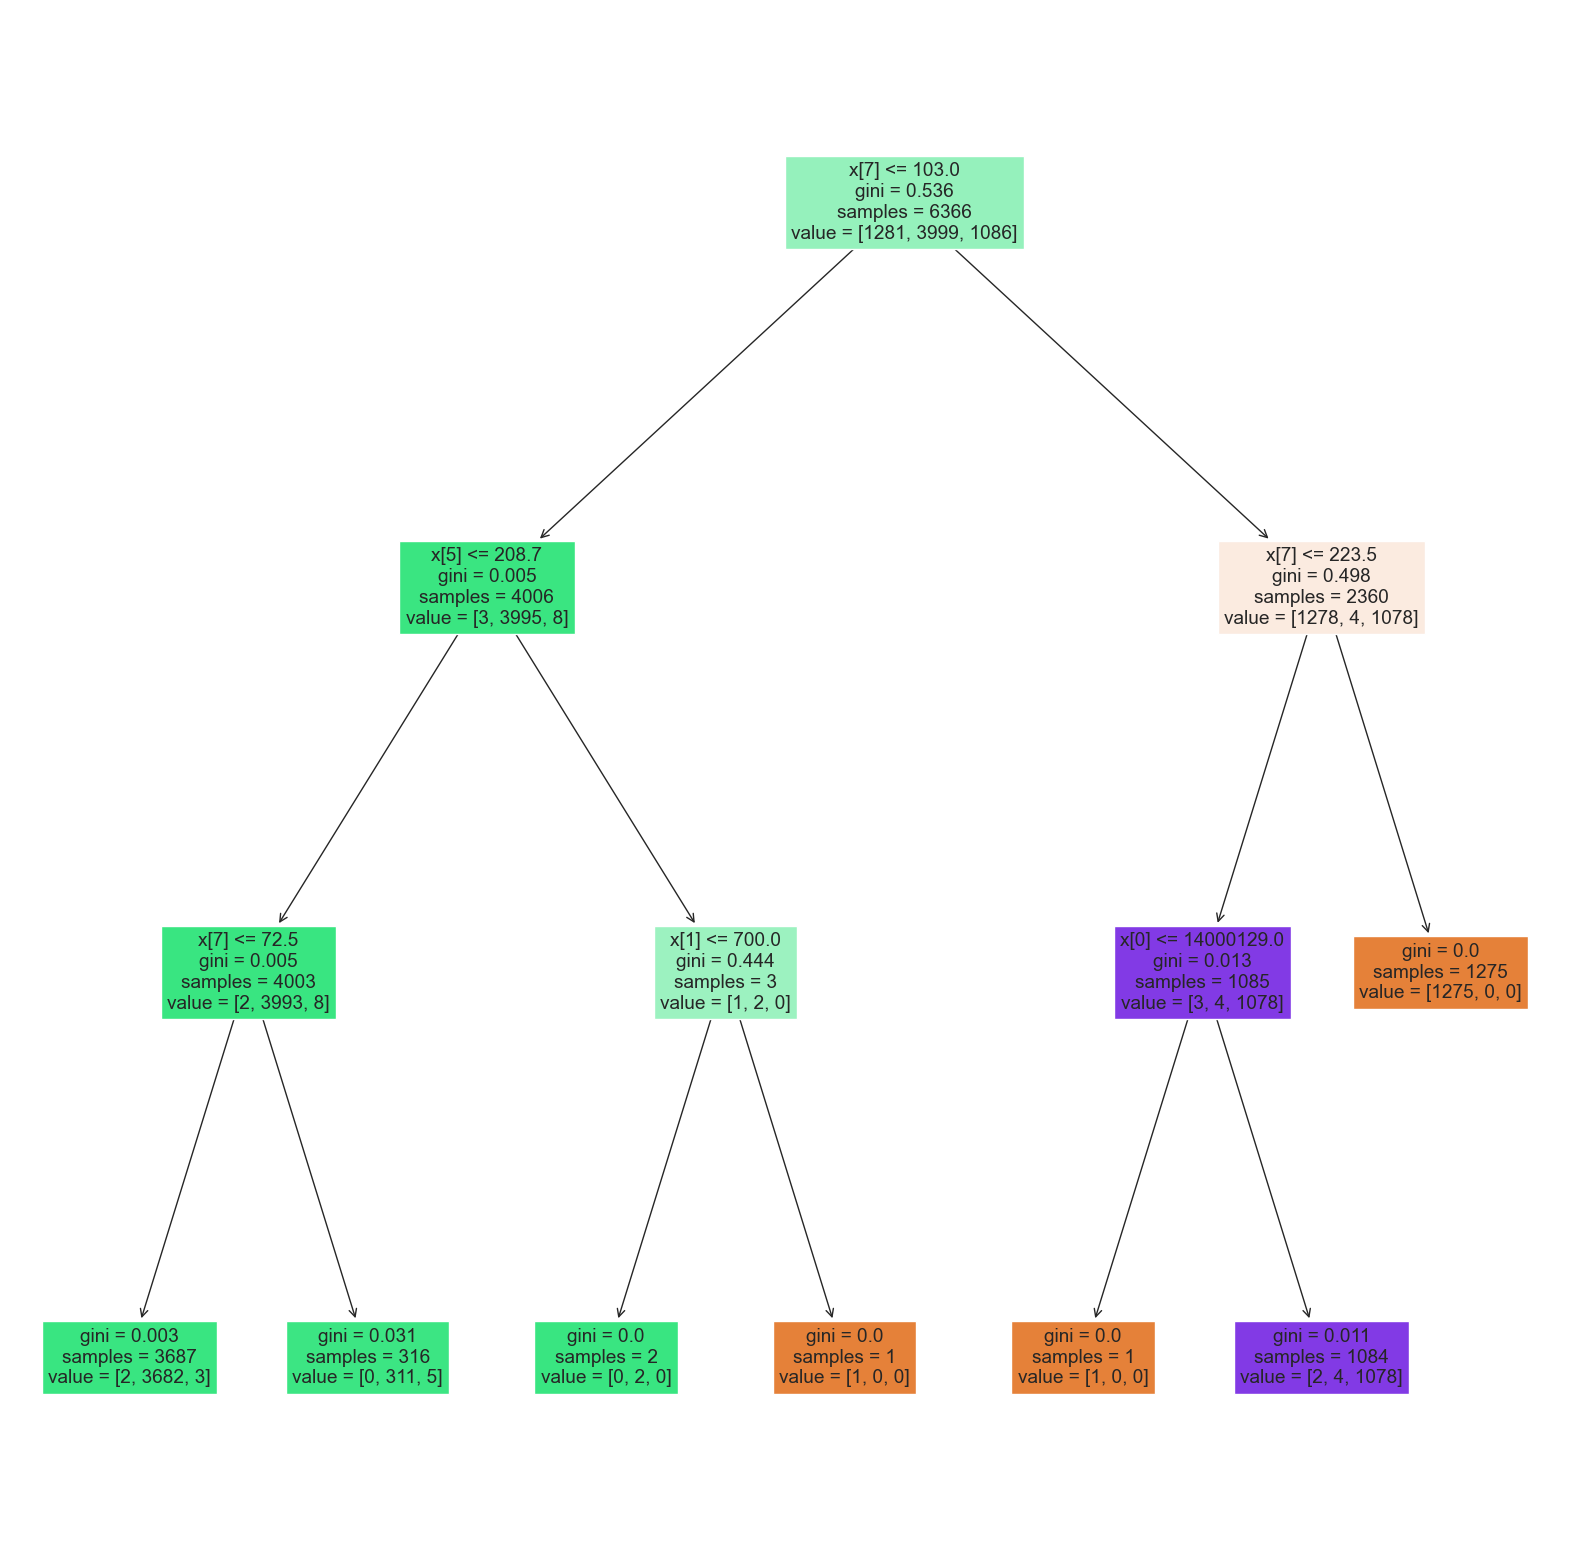

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True)
plt.show()

In [17]:
conf_matrix = confusion_matrix(y_test, predictions)

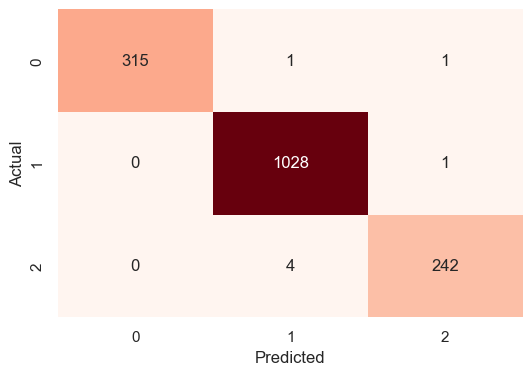

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
report = classification_report(y_test, predictions)

In [20]:
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       1.00      1.00      1.00      1029
           2       0.99      0.98      0.99       246

    accuracy                           1.00      1592
   macro avg       1.00      0.99      0.99      1592
weighted avg       1.00      1.00      1.00      1592



## VI. Making Predictions over Production Sets

In [21]:
new_data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/New_Data.csv")
new_data.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status
0,14002592,Woman,300,84.880000,45.0,290.52,21.42,489.45,118,Blocked by Easy Credit
1,14003493,Woman,300,273.750000,45.0,292.50,23.12,486.72,118,Blocked by Easy Credit
2,14004370,Man,300,23.364118,0.0,0.00,0.00,0.00,0,Active
3,14004494,Man,300,10.780645,45.0,257.42,15.06,433.21,118,Blocked by Easy Credit
4,14007143,Woman,300,31.832143,45.0,298.85,19.59,402.33,28,Blocked by Easy Credit


In [22]:
df_features = pd.get_dummies(new_data)
df_features.head()


,CID,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked By Cardissuer,Card Status_Blocked by Customer,Card Status_Blocked by Easy Credit,Card Status_Lost,Card Status_Stolen
0,14002592,300,84.880000,45.0,290.52,21.42,489.45,118,0,1,0,0,0,1,0,0
1,14003493,300,273.750000,45.0,292.50,23.12,486.72,118,0,1,0,0,0,1,0,0
2,14004370,300,23.364118,0.0,0.00,0.00,0.00,0,1,0,1,0,0,0,0,0
3,14004494,300,10.780645,45.0,257.42,15.06,433.21,118,1,0,0,0,0,1,0,0
4,14007143,300,31.832143,45.0,298.85,19.59,402.33,28,0,1,0,0,0,1,0,0


In [23]:
df_features.drop('Card Status_Blocked By Cardissuer', axis=1, inplace=True)
df_features.head()

,CID,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked by Customer,Card Status_Blocked by Easy Credit,Card Status_Lost,Card Status_Stolen
0,14002592,300,84.880000,45.0,290.52,21.42,489.45,118,0,1,0,0,1,0,0
1,14003493,300,273.750000,45.0,292.50,23.12,486.72,118,0,1,0,0,1,0,0
2,14004370,300,23.364118,0.0,0.00,0.00,0.00,0,1,0,1,0,0,0,0
3,14004494,300,10.780645,45.0,257.42,15.06,433.21,118,1,0,0,0,1,0,0
4,14007143,300,31.832143,45.0,298.85,19.59,402.33,28,0,1,0,0,1,0,0


In [24]:
new_predictions = clf.predict(df_features)
new_predictions

array([2, 2, 1, ..., 1, 1, 1], dtype=int8)

In [25]:
df_features['PREDICTED_CLASS'] = new_predictions
df_features.head()

,CID,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked by Customer,Card Status_Blocked by Easy Credit,Card Status_Lost,Card Status_Stolen,PREDICTED_CLASS
0,14002592,300,84.880000,45.0,290.52,21.42,489.45,118,0,1,0,0,1,0,0,2
1,14003493,300,273.750000,45.0,292.50,23.12,486.72,118,0,1,0,0,1,0,0,2
2,14004370,300,23.364118,0.0,0.00,0.00,0.00,0,1,0,1,0,0,0,0,1
3,14004494,300,10.780645,45.0,257.42,15.06,433.21,118,1,0,0,0,1,0,0,2
4,14007143,300,31.832143,45.0,298.85,19.59,402.33,28,0,1,0,0,1,0,0,1


In [26]:
predicted_class_counts = df_features['PREDICTED_CLASS'].value_counts()
print(predicted_class_counts)

1    2035
2     117
Name: PREDICTED_CLASS, dtype: int64


In [27]:
predicted_classes = pd.Series(new_predictions)

df_features['PREDICTED_CLASS'] = predicted_classes.map({1: 'MiddleRisk', 2: 'HighRisk'})

df_features.head()

,CID,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked by Customer,Card Status_Blocked by Easy Credit,Card Status_Lost,Card Status_Stolen,PREDICTED_CLASS
0,14002592,300,84.880000,45.0,290.52,21.42,489.45,118,0,1,0,0,1,0,0,HighRisk
1,14003493,300,273.750000,45.0,292.50,23.12,486.72,118,0,1,0,0,1,0,0,HighRisk
2,14004370,300,23.364118,0.0,0.00,0.00,0.00,0,1,0,1,0,0,0,0,MiddleRisk
3,14004494,300,10.780645,45.0,257.42,15.06,433.21,118,1,0,0,0,1,0,0,HighRisk
4,14007143,300,31.832143,45.0,298.85,19.59,402.33,28,0,1,0,0,1,0,0,MiddleRisk


In [28]:
df_features.to_csv("C:/Users/aleksandar.dimitrov/Desktop/ProductionalData.csv", index=False)